# Importing Libraries


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load the Dataset


In [44]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# View Data


In [45]:
print(df.head())
print("\nInfo:\n", df.info())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

# Data Check and Transform

In [46]:
df.shape
df.columns
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [47]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


# Check Duplication


In [48]:
df.duplicated().sum()

np.int64(2)

# Dropping Duplicate Values


In [49]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

# Checking Distribution of categorical data


In [51]:
print(df['Fuel_Type'].value_counts())
print(df['Selling_type'].value_counts())
print(df['Transmission'].value_counts())

Fuel_Type
2    239
1     58
0      2
Name: count, dtype: int64
Selling_type
0    193
1    106
Name: count, dtype: int64
Transmission
1    260
0     39
Name: count, dtype: int64


# Price Distribution


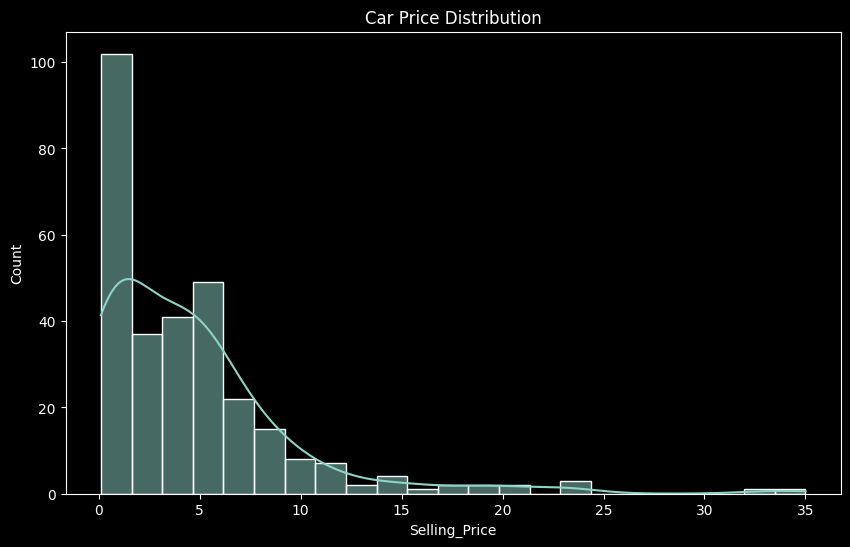

In [52]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Car Price Distribution')
plt.show()

# Correlation Heatmap


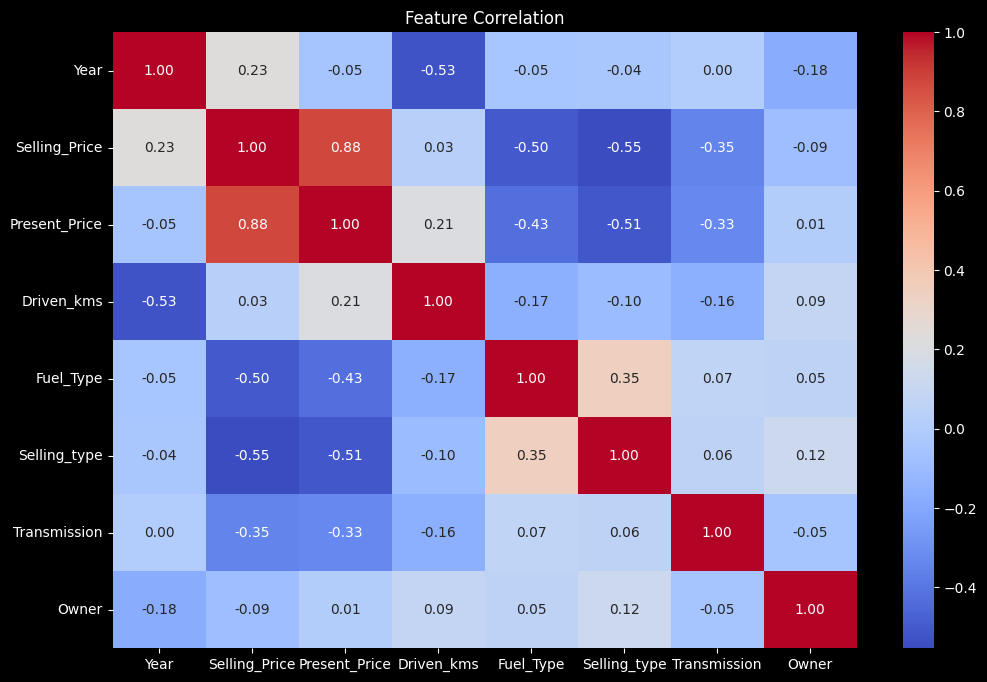

In [53]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Feature Correlation')
plt.show()

# Pairplot of Numerical Features


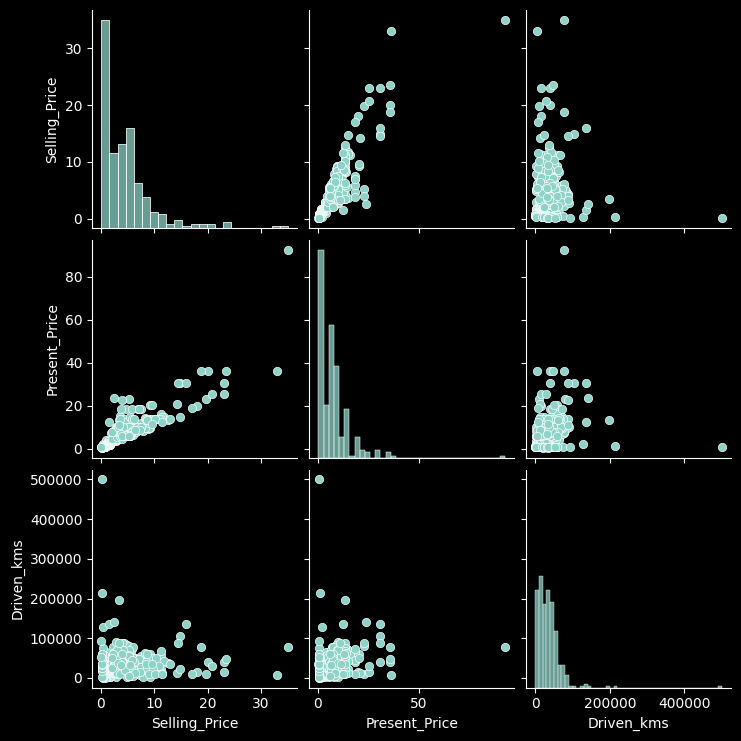

In [54]:
plt.style.use('dark_background')
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Driven_kms']])
plt.show()

# Boxplots for Categorical Features:
# Selling Price by Fuel Type

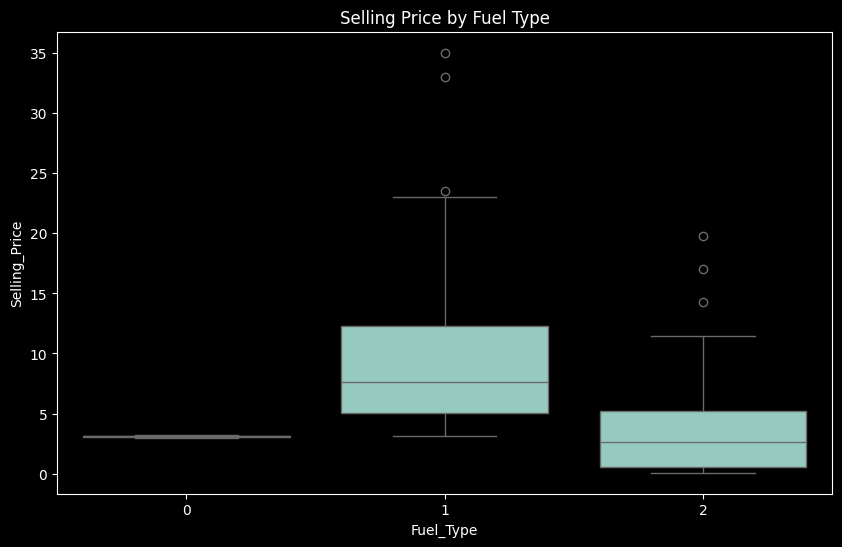

In [55]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Selling Price by Fuel Type')
plt.show()

# Selling Price by Transmission Type


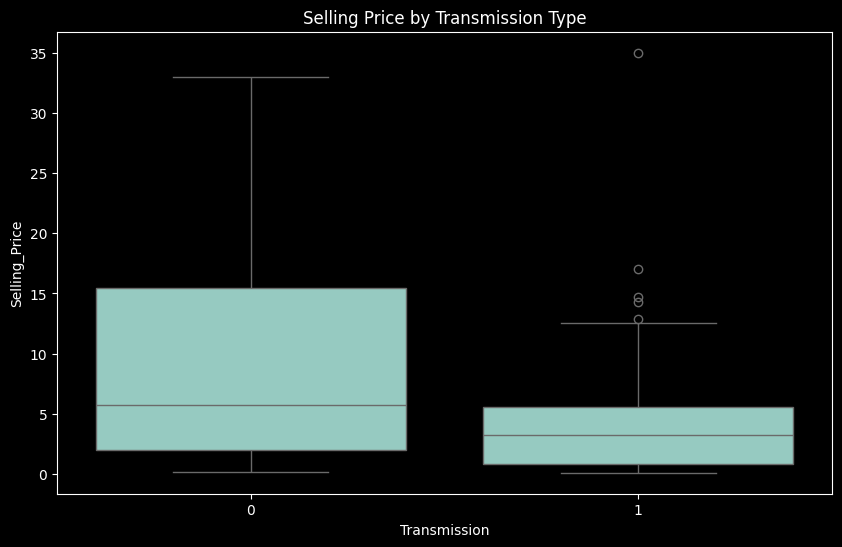

In [56]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Selling Price by Transmission Type')
plt.show()

# Calculate Average Price for each Car Model


In [57]:
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top Car Models by Average Price


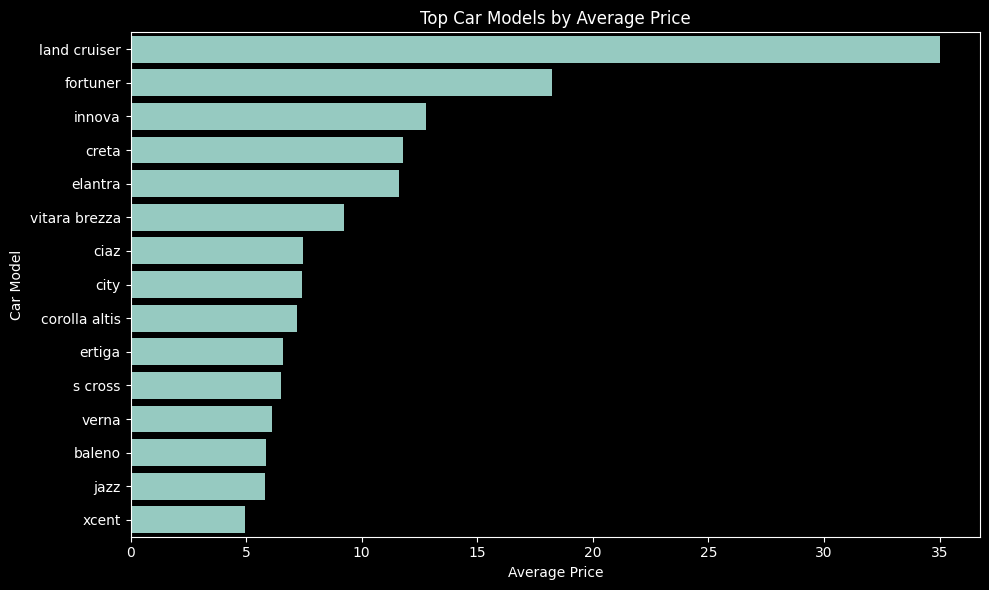

In [58]:
plt.style.use('dark_background')
Top_car_models = avg_prices_by_car.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=Top_car_models.values, y=Top_car_models.index)
plt.title('Top Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

# Splitting the Dataset


In [59]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

# Encode Categorical Variables


In [60]:
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


# Fuel Type Impact


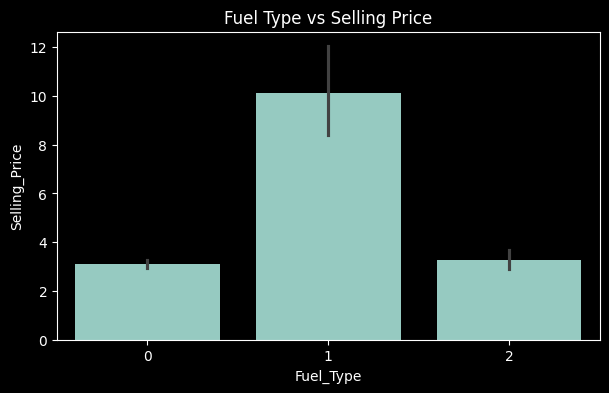

In [66]:
plt.figure(figsize=(7, 4))
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Fuel Type vs Selling Price')
plt.show()

# Price Distribution by Year


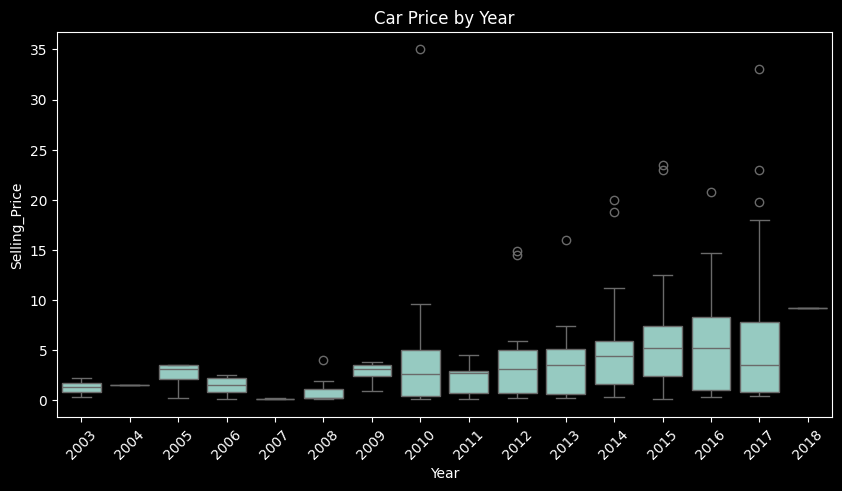

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Year', y='Selling_Price', data=df)
plt.title('Car Price by Year')
plt.xticks(rotation=45)
plt.show()

# Seller Type Impact


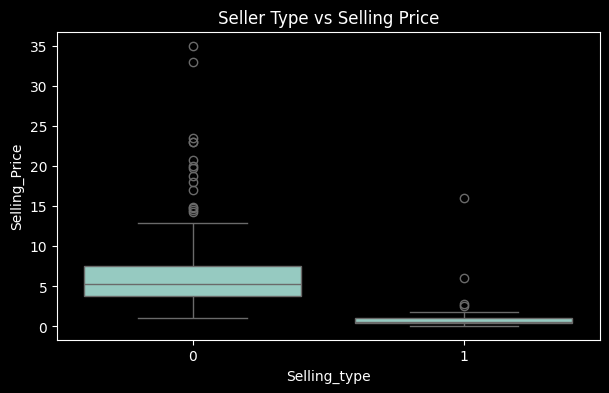

In [68]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Selling_type', y='Selling_Price', data=df)
plt.title('Seller Type vs Selling Price')
plt.show()

# Feature Selection


In [69]:
X = df[['Year', 'Selling_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission']]
y = df['Selling_Price']

# Train-Test Split


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training


In [71]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Predictions


In [72]:
y_pred = model.predict(X_test)

# Evaluation


In [73]:
print("\nMean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.18466833333333288
R² Score: 0.9670985451826561
